In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_csv('Top_lane.csv')
lane = df.drop(columns = ['Lane', 'Unnamed: 0', 'Summoner', 'Item_0', 'Item_1', 'Item_2', 'Item_3', 'Item_4', 'Item_5', 'Item_6'])

In [3]:
lane.head()

,Champion,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
0,86,4,3,9,3,1,12374,3836,2547,26232,8472,14,0,12,31
1,92,9,7,1,4,1,15022,3893,692,22422,11106,15,3,20,26
2,518,3,6,4,2,1,16640,19544,6147,18458,11011,15,0,18,25
3,39,6,10,3,3,2,17448,3386,2879,34884,14624,17,5,19,10
4,13,4,3,8,2,2,13014,7945,1234,11345,9202,13,2,15,12


In [4]:
lane.groupby('Champion').mean().head()

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls
Champion,,,,,,,,,,,,,,
1,4.826087,5.608696,6.086957,2.202899,1.434783,16272.985507,4308.014493,2005.507246,17438.463768,10397.681159,14.202899,2.217391,18.840580,24.550725
2,5.618919,5.343243,5.613514,2.867568,1.489189,16017.700000,9758.316216,3713.770270,25418.889189,11139.800000,14.418919,2.094595,20.440541,14.083784
3,3.785714,6.785714,11.357143,1.285714,1.107143,11440.000000,2909.250000,1337.857143,21570.642857,9571.321429,13.821429,5.392857,48.142857,34.178571
4,4.465257,5.057402,7.386707,2.268882,1.199396,15489.504532,7987.413897,4547.634441,19079.897281,12000.253776,14.570997,3.743202,26.039275,33.377644
5,3.000000,8.500000,11.937500,1.437500,1.000000,18048.125000,16080.062500,2900.625000,39790.000000,11489.000000,15.187500,3.812500,36.625000,22.312500


In [5]:
model = KMeans(n_clusters = 4).fit(lane)

In [6]:
model.cluster_centers_

array([[1.16842610e+02, 7.52670142e+00, 4.06312526e+00, 7.30421305e+00,
        4.19628012e+00, 1.70607299e+00, 2.05532884e+04, 1.55622409e+04,
        7.35979879e+03, 2.23801811e+04, 1.32872494e+04, 1.56616880e+01,
        2.34535719e+00, 2.29308158e+01, 1.92908271e+01],
       [1.28854813e+02, 3.34004904e+00, 4.56667733e+00, 4.41925168e+00,
        1.78946807e+00, 1.15797889e+00, 1.11131347e+04, 4.26485167e+03,
        2.42664998e+03, 1.67939073e+04, 8.94299371e+03, 1.32454429e+01,
        1.97297729e+00, 1.70199872e+01, 1.59826245e+01],
       [1.31032930e+02, 5.28763441e+00, 6.66103831e+00, 6.67137097e+00,
        2.44640457e+00, 1.39986559e+00, 1.81338945e+04, 5.54832300e+03,
        2.84692305e+03, 2.90563015e+04, 1.16056045e+04, 1.52407594e+01,
        2.29662298e+00, 2.14749664e+01, 2.14327957e+01],
       [1.24013523e+02, 9.66927639e+00, 7.14875445e+00, 9.16251483e+00,
        4.31838671e+00, 1.82419929e+00, 3.18641590e+04, 1.33909791e+04,
        5.75560403e+03, 4.19109229e+0

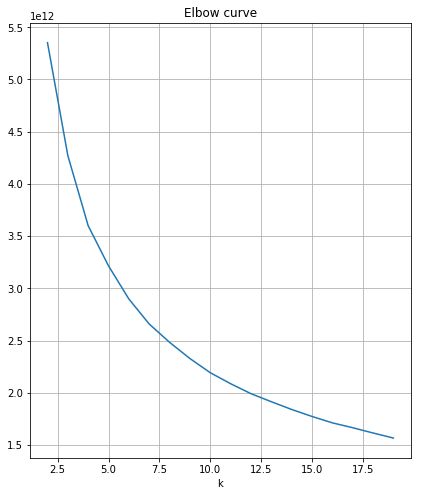

In [7]:
distorsions = []

for k in range(2,20):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(lane)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.plot(range(2, 20), distorsions)
plt.grid(True)

In [8]:
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(lane)
    silhouette_avg = metrics.silhouette_score(lane, cluster_labels)
    silhouette_plot.append(silhouette_avg)

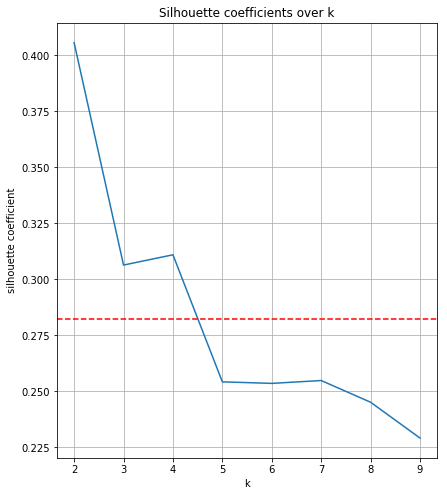

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [10]:
k_means = KMeans(n_clusters = 5).fit(lane.groupby('Champion').mean())
cluster_assignments = k_means.predict(lane.groupby('Champion').mean())

In [11]:
cluster_assignments

array([1, 2, 4, 1, 0, 2, 1, 2, 1, 2, 0, 2, 1, 2, 3, 4, 1, 1, 2, 0, 3, 3,
       0, 2, 4, 4, 2, 4, 4, 1, 2, 4, 1, 1, 1, 2, 1, 2, 2, 4, 2, 1, 1, 4,
       1, 2, 2, 3, 4, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 0, 1, 1, 2, 4, 3, 2,
       2, 2, 2, 2, 1, 3, 2, 2, 2, 1, 2, 4, 1, 1, 2, 3, 2, 4, 1, 2, 1, 2,
       1, 2, 2, 1, 4, 1, 2, 2, 3, 4, 3, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 3, 2, 2, 1, 1, 1, 2, 4, 3, 0, 1, 2, 3, 1, 2, 2, 2, 2, 2, 4, 1,
       4, 4, 2, 0, 4, 3, 4, 4, 3, 2, 2, 1, 2], dtype=int32)

In [12]:
clustered = lane.groupby('Champion').mean()

In [13]:
clustered['Cluster'] = cluster_assignments

In [14]:
clustered

,Kills,Deaths,Assists,Killing_Spree,Multikills,Total_Damage,Damage_To_Objectives,Damage_To_Turrets,Damage_Taken,Gold_Earned,Champ_Level,Wards_Bought,Vision_Score,Crowd_Controls,Cluster
Champion,,,,,,,,,,,,,,,
1,4.826087,5.608696,6.086957,2.202899,1.434783,16272.985507,4308.014493,2005.507246,17438.463768,10397.681159,14.202899,2.217391,18.840580,24.550725,1
2,5.618919,5.343243,5.613514,2.867568,1.489189,16017.700000,9758.316216,3713.770270,25418.889189,11139.800000,14.418919,2.094595,20.440541,14.083784,2
3,3.785714,6.785714,11.357143,1.285714,1.107143,11440.000000,2909.250000,1337.857143,21570.642857,9571.321429,13.821429,5.392857,48.142857,34.178571,4
4,4.465257,5.057402,7.386707,2.268882,1.199396,15489.504532,7987.413897,4547.634441,19079.897281,12000.253776,14.570997,3.743202,26.039275,33.377644,1
5,3.000000,8.500000,11.937500,1.437500,1.000000,18048.125000,16080.062500,2900.625000,39790.000000,11489.000000,15.187500,3.812500,36.625000,22.312500,0
6,6.152597,4.902597,5.548701,3.327922,1.584416,15818.029221,7514.782468,3137.714286,22186.441558,11409.675325,14.724026,2.480519,22.717532,20.259740,2
7,7.238095,4.428571,6.428571,3.650794,1.539683,19979.444444,5995.936508,3105.412698,21374.904762,12178.301587,15.111111,2.793651,24.253968,15.238095,1
8,4.969402,5.073713,5.159944,2.538248,1.470097,19402.553547,6920.588317,3010.852573,27429.703755,11129.780250,14.933241,2.169680,18.919332,3.663421,2
9,4.800000,7.100000,10.800000,0.800000,1.300000,19620.400000,2761.100000,1044.400000,19445.200000,9730.900000,13.200000,2.800000,23.400000,80.500000,1
